In [1]:
from gensim.models import doc2vec
from sklearn.decomposition import PCA
import gensim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import sys
import csv
from sklearn.manifold import TSNE
from scipy import stats

#p = r"[\!\"\#\$\%\&\\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\[\\\]\^\_\`\{\|\}\~]"
#
#with open('/Users/shrey/AnacondaProjects/Application_reviews/RawData/appreviewsample2.csv') as csvfile:
#    readCSV = csv.reader(csvfile, delimiter=',')
#    count = 0
#    a = []
#    # for row in readCSV:
#    #     if count < 5:
#    #         #b = row.split(',')
#    #         a.append(row)
#    #     count += 1
#    data = [row for row in csv.reader(csvfile.read().splitlines())]
#
#with open('/Users/shrey/Documents/a2.txt','w') as tfile:
#    for ele in data[1:]:
#        if len(ele) >= 3:
#            s = ele[1] + " " + ele[2]
#            s = re.sub(p,' ',s)
#            print(s,file=tfile)
            
path = '/Users/shrey/AnacondaProjects/Application_reviews/Experiments/CNN/CleanedData/Lemmatizingdata.txt'        
document = doc2vec.TaggedLineDocument(path)
#lines = []
#with open('/Users/shrey/AnacondaProjects/Application_reviews/Experiments/PilotRandom/CleanedData/a2.txt','r') as tfile:
#    for line in tfile:
#        line  = line.replace("\n","")
#        lines.append([line])


model = doc2vec.Doc2Vec(document, size = 200, window=8, min_count=5, workers=4)

#model.docvecs.most_similar("10")
#model.wv.similarity("fantacstic","great")
#words = list(model.wv.vocab)
#print(words)

pca = PCA(n_components=2)
result = pca.fit_transform(model.docvecs.doctag_syn0)
print (len(result))

t  = stats.zscore(model.docvecs.doctag_syn0, axis=0)
           
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')


#model.wv.most_similar(positive = ["speed"], topn=100)
#model.wv.most_similar(positive = ["UI"], topn=100)
#model.wv.most_similar(positive = ["privacy"], topn=100)
#model.wv.most_similar(positive = ["Memory"], topn=100)

############ PLOT ##############################
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(result[:, 0], result[:, 1],result[:, 2], s=1)  #PCA PLOT
##words = list(model.wv.vocab)


#for i, line in enumerate(lines):
#	plt.annotate(lines.index(line), xy=(result[i, 0], result[i, 1]))
tsne_lda = tsne_model.fit_transform(t)
plt.figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(tsne_lda[:, 0], tsne_lda[:, 1], s=1)
plt.show()



/Users/shrey/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/Users/shrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).


74109
[t-SNE] Computing 91 nearest neighbors...


/Users/shrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).


[t-SNE] Indexed 74109 samples in 1.108s...
[t-SNE] Computed neighbors for 74109 samples in 2563.584s...
[t-SNE] Computed conditional probabilities for sample 1000 / 74109
[t-SNE] Computed conditional probabilities for sample 2000 / 74109
[t-SNE] Computed conditional probabilities for sample 3000 / 74109
[t-SNE] Computed conditional probabilities for sample 4000 / 74109
[t-SNE] Computed conditional probabilities for sample 5000 / 74109
[t-SNE] Computed conditional probabilities for sample 6000 / 74109
[t-SNE] Computed conditional probabilities for sample 7000 / 74109
[t-SNE] Computed conditional probabilities for sample 8000 / 74109
[t-SNE] Computed conditional probabilities for sample 9000 / 74109
[t-SNE] Computed conditional probabilities for sample 10000 / 74109
[t-SNE] Computed conditional probabilities for sample 11000 / 74109
[t-SNE] Computed conditional probabilities for sample 12000 / 74109
[t-SNE] Computed conditional probabilities for sample 13000 / 74109
[t-SNE] Computed cond

<Figure size 1600x960 with 1 Axes>

In [2]:
import pickle
with open ('/Users/shrey/Desktop/d2vtsne.mo','wb') as f:
    pickle.dump(tsne_lda,f) 

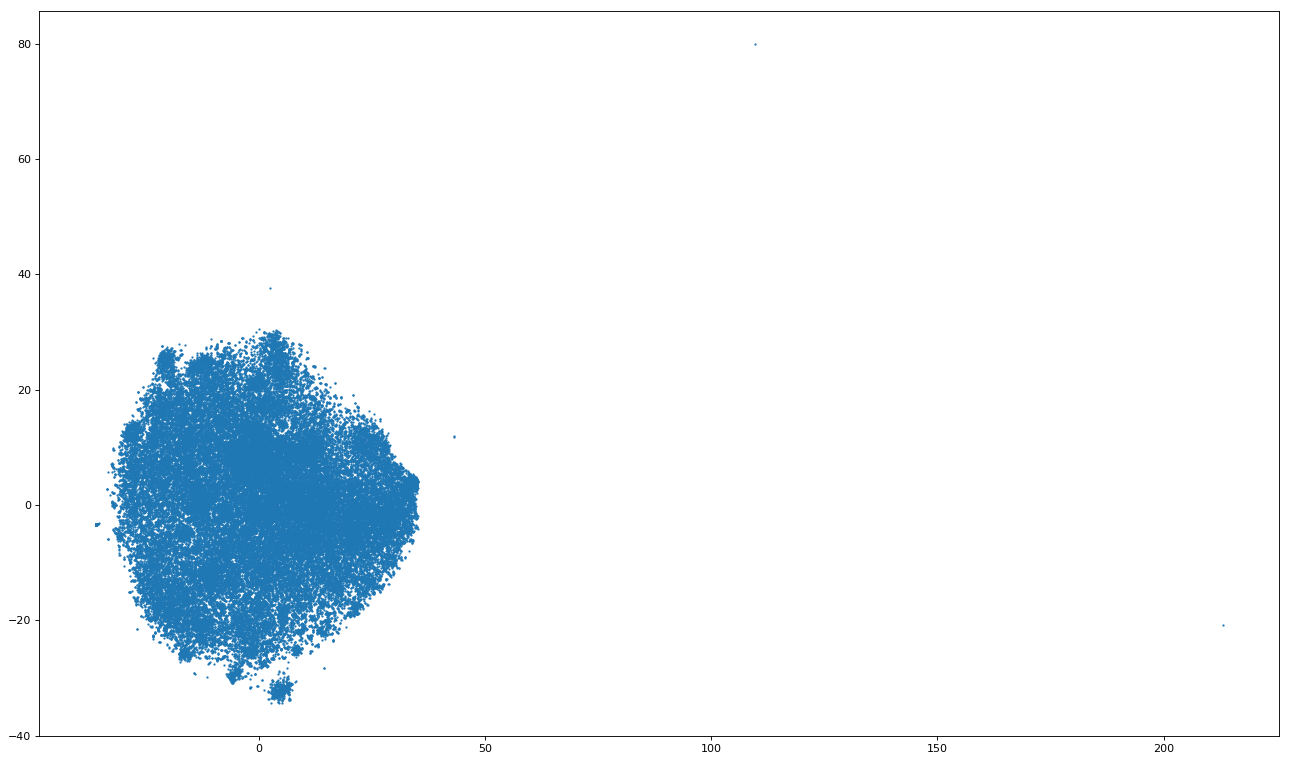

In [3]:
with open ('/Users/shrey/Desktop/d2vtsne.mo','rb') as f:
    tsne_lda = pickle.load(f) 
plt.figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(tsne_lda[:, 0], tsne_lda[:, 1], s=1)
plt.show()